# Implementing IoT – Machine Learning Notebook

## Objective
The objective of this notebook is to test and run machine learning code using Jupyter Notebook in VS Code.


## Introduction

This notebook is created in VS Code using Jupyter.
It contains code cells and note (markdown) cells between them.


In [1]:
print("Jupyter Notebook is working correctly")



Jupyter Notebook is working correctly


In [ ]:
%pip install numpy pandas matplotlib



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported successfully")


Libraries imported successfully


## Imported Libraries

- **NumPy** is used for numerical operations.
- **Pandas** is used to load and handle datasets.
- **Matplotlib** is used to create plots and visualizations.


In [7]:
# Create a simple sample dataset
data = {
    "Temperature": [22, 25, 23, 26, 24],
    "Humidity": [45, 50, 48, 55, 52],
    "DeviceOn": [0, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
df


,Temperature,Humidity,DeviceOn
0,22,45,0
1,25,50,1
2,23,48,0
3,26,55,1
4,24,52,1


## Dataset Description

This sample dataset represents basic IoT sensor data.
- Temperature and humidity are input features.
- DeviceOn is the output label (0 = OFF, 1 = ON).


In [8]:
# Separate input features and output label
X = df[["Temperature", "Humidity"]]
y = df["DeviceOn"]

X, y


(   Temperature  Humidity
 0           22        45
 1           25        50
 2           23        48
 3           26        55
 4           24        52,
 0    0
 1    1
 2    0
 3    1
 4    1
 Name: DeviceOn, dtype: int64)

## Feature and Label Separation

- **X** contains the input features used for prediction.
- **y** contains the output label.
- This separation is required before training a machine learning model.


In [ ]:
%pip install scikit-learn


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
# Predict device status for new sensor data
new_data = [[24, 50]]
prediction = model.predict(new_data)

prediction


c:\Users\shoshe\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Conclusion

In this notebook, a simple machine learning model was implemented using Logistic Regression.
The model was trained on sample IoT sensor data and used to predict device status.
This demonstrates how machine learning can be applied in IoT systems.


New start here

In [2]:
import tensorflow as tf
import numpy as np
import sys
print(sys.executable)
print("TF:", tf.__version__)
# 1) Scalars, vectors, matrices, tensors
scalar = tf.constant(7) # rank-0
vector = tf.constant([10, 20, 30]) # rank-1
matrix = tf.constant([[1., 2.], [3., 4.]]) # rank-2
tensor = tf.constant([[[1],[2]], [[3],[4]]]) # rank-3 (2x2x1)
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)
# 2) Dtypes and casting
x = tf.constant([1.7, 7.4]) # float32 default
y = tf.constant([7, 10]) # int32 default
x16 = tf.cast(x, tf.float16) # reduced precision floats
y32 = tf.cast(y, tf.float32) # cast ints → floats
# 3) Indexing and shaping
rank2 = tf.constant([[10, 7], [3, 4]])
last_col = rank2[:, -1] # column slice
expanded = tf.expand_dims(rank2, -1) # add channel-like axis
squeezed = tf.squeeze(expanded, axis=-1)
# 4) Broadcasting & basic ops
A = tf.constant([[10., 7.], [3., 4.]])
print("A+10:\n", A + 10)
print("A*2:\n", A * 2)
# 5) Matrix multiplication rules (inner dims match)
X = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32) # (3x2)
Y = tf.constant([[7, 8], [9, 10], [11, 12]], dtype=tf.float32) # (3x2)
XtY = tf.matmul(X, tf.transpose(Y)) # (3x2) @ (2x3) -> (3x3)
# 6) Aggregations
E = tf.constant(np.random.randint(0, 100, size=10))
print("min:", tf.reduce_min(E).numpy(),
"max:", tf.reduce_max(E).numpy(),
"mean:", tf.reduce_mean(tf.cast(E, tf.float32)).numpy(),
"sum:", tf.reduce_sum(E).numpy())
# 7) One-hot encoding
idx = tf.constant([0, 1, 2, 3])
oh = tf.one_hot(idx, depth=4)
# 8) NumPy interop
arr = np.array([3., 7., 10.])
t = tf.constant(arr) # NumPy -> Tensor
back_to_np = t.numpy() # Tensor -> NumPy
print("OK")

c:\Users\shoshe\AppData\Local\Programs\Python\Python310\python.exe
TF: 2.20.0
() (3,) (2, 2) (2, 2, 1)
A+10:
 tf.Tensor(
[[20. 17.]
 [13. 14.]], shape=(2, 2), dtype=float32)
A*2:
 tf.Tensor(
[[20. 14.]
 [ 6.  8.]], shape=(2, 2), dtype=float32)
min: 13 max: 95 mean: 54.2 sum: 542
OK


In [1]:
import tensorflow as tf
print(tf.__version__)


2.20.0


CODING, START HERE: Regression (Neural Network predicting a number)

Test MAE: 16.112957000732422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


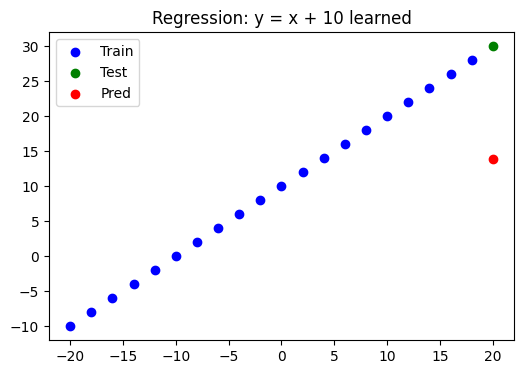

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Synthetic linear data
X = np.arange(-20, 21, 2, dtype=np.float32) # [-20, -18, ..., 20]
y = X + 10
# Train/test split (simple)
X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]
# 1) CREATE
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(1,)),
 tf.keras.layers.Dense(1) # linear output for regression
])
# 2) COMPILE
model.compile(
 loss="mae",
 optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
 metrics=["mae"]
)
# 3) FIT
history = model.fit(X_train, y_train, epochs=200, verbose=0)
# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", mae)
# Predict and visualize
y_pred = model.predict(X_test).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_pred, c='r', label='Pred')
plt.legend(); plt.title("Regression: y = x + 10 learned")
plt.show()

Binary classification on non-linear data (circles)

Test accuracy: 0.995


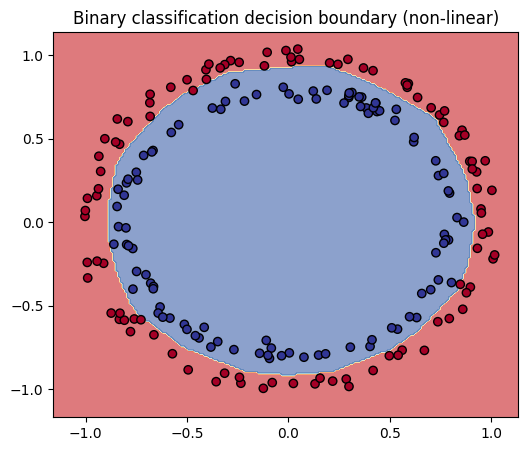

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
# Non-linear separable data
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
 random_state=42)
# 1) CREATE (use non-linear activations + sigmoid output)
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(2,)),
 tf.keras.layers.Dense(16, activation="relu"),
 tf.keras.layers.Dense(16, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2) COMPILE
model.compile(
 loss="binary_crossentropy",
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
 metrics=["accuracy"]
)
# 3) FIT
history = model.fit(X_train, y_train, epochs=25, verbose=0)
# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")
# Visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 200),
 np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs>0.5).astype(int), cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("Binary classification decision boundary (non-linear)")
plt.show()


Multiclass classification with Fashion‑MNIST


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Test accuracy: 0.8804000020027161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


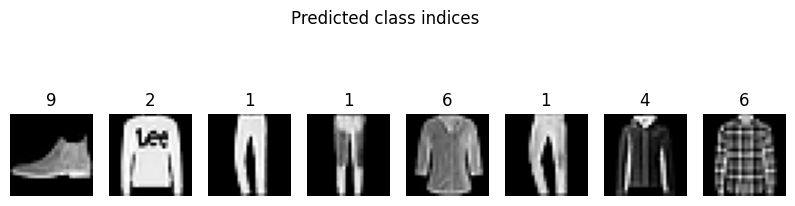

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize to [0,1]
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
# 1) CREATE (flatten > Dense ReLU > Dense softmax)
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(28, 28)),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
])
# 2) COMPILE
model.compile(
 loss="sparse_categorical_crossentropy", # labels are ints, not one-hot
 optimizer="adam",
 metrics=["accuracy"]
)
# 3) FIT
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)
# Show a few preds
preds = model.predict(x_test[:8]).argmax(axis=1)
plt.figure(figsize=(10,3))
for i in range(8):
 plt.subplot(1,8,i+1)
 plt.imshow(x_test[i], cmap='gray')
 plt.title(int(preds[i]))
 plt.axis('off')
plt.suptitle("Predicted class indices"); plt.show()

CODING, START HERE: CNNs for Images

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Use Fashion-MNIST but map 2 classes to a binary task (e.g., class 9=Ankle boot vs 7=Sneaker)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Keep only classes 7 and 9
train_mask = np.isin(y_train, [7, 9])
test_mask = np.isin(y_test, [7, 9])
x_train = x_train[train_mask][..., None]/255.0
y_train = (y_train[train_mask] == 9).astype(np.float32) # 1 if class 9 else 0
x_test = x_test[test_mask][..., None]/255.0
y_test = (y_test[test_mask] == 9).astype(np.float32)
# 1) CREATE (small CNN)
model = tf.keras.Sequential([
 tf.keras.layers.Input(shape=(28,28,1)),
 tf.keras.layers.Conv2D(16, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2) COMPILE
model.compile(
 loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"]
)
# 3) FIT
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

Test accuracy: 0.9725000262260437


CODING, START HERE: Transfer Learning (Feature Extraction)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
# Data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Keep classes 0,1,2 only
mask_train = (y_train < 3).flatten()
mask_test = (y_test < 3).flatten()
x_train = x_train[mask_train].astype("float32")/255.0
y_train = y_train[mask_train].flatten()
x_test = x_test[mask_test].astype("float32")/255.0
y_test = y_test[mask_test].flatten()
# Small CNN model
model = models.Sequential([
layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
layers.MaxPooling2D(),
layers.Conv2D(64, (3,3), activation="relu", padding="same"),
layers.MaxPooling2D(),
layers.Conv2D(128, (3,3), activation="relu", padding="same"),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(64, activation="relu"),
layers.Dense(3, activation="softmax")
])
model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)
# Train
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=64,
validation_split=0.1,
verbose=1
)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy (tiny CNN):", acc)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 372s 2us/step
Epoch 1/5


c:\Users\shoshe\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7271 - loss: 0.6280 - val_accuracy: 0.8420 - val_loss: 0.4227
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8404 - loss: 0.4004 - val_accuracy: 0.8773 - val_loss: 0.3393
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8719 - loss: 0.3285 - val_accuracy: 0.8967 - val_loss: 0.3037
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8911 - loss: 0.2831 - val_accuracy: 0.8860 - val_loss: 0.3017
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9033 - loss: 0.2476 - val_accuracy: 0.8973 - val_loss: 0.2859
Test accuracy (tiny CNN): 0.8756666779518127
